In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import evaluate as ev
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.float_format = '{:20,.4f}'.format

In [2]:
df = w.wrangle_zillow()

In [3]:
df.shape

(60267, 22)

In [4]:
list(df.columns)

['parcelid',
 'bathrooms',
 'bedrooms',
 'property_sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'prop_cnty_land_code',
 'prop_land_type_id',
 'census_tract_and_block',
 'region_id_county',
 'unitcnt',
 'year_built',
 'struct_tax_value',
 'tax_value',
 'assessment_year',
 'land_tax_value',
 'tax_amount',
 'log_error',
 'transaction_date',
 'log_error_class']

In [5]:
df.head()

,parcelid,bathrooms,bedrooms,property_sqft,fips,latitude,longitude,lot_sqft,prop_cnty_land_code,prop_land_type_id,...,unitcnt,year_built,struct_tax_value,tax_value,assessment_year,land_tax_value,tax_amount,log_error,transaction_date,log_error_class
0,10711855,2.0000,3.0000,"2,107.0000",6037,"34,222,559.0000","-118,617,387.0000","9,158.0000",0101,261,...,1.0000,"1,972.0000","249,655.0000","624,139.0000","2,016.0000","374,484.0000","7,659.3600",-0.0074,2017-07-07,s2
1,10711877,2.0000,4.0000,"1,882.0000",6037,"34,220,261.0000","-118,616,409.0000","9,035.0000",0101,261,...,1.0000,"1,972.0000","253,000.0000","660,000.0000","2,016.0000","407,000.0000","8,123.9100",0.0211,2017-08-29,s3
2,10711888,2.0000,4.0000,"1,882.0000",6037,"34,222,491.0000","-118,616,854.0000","9,800.0000",0100,261,...,1.0000,"1,972.0000","257,591.0000","542,923.0000","2,016.0000","285,332.0000","6,673.2400",0.0772,2017-04-04,s4
3,10711910,2.0000,3.0000,"1,477.0000",6037,"34,221,864.0000","-118,615,739.0000","11,285.0000",0101,261,...,1.0000,"1,960.0000","57,968.0000","78,031.0000","2,016.0000","20,063.0000","1,116.4600",-0.0412,2017-03-17,s1
4,10711923,2.0000,4.0000,"1,918.0000",6037,"34,220,619.0000","-118,615,253.0000","11,239.0000",0101,261,...,1.0000,"1,960.0000","167,869.0000","415,459.0000","2,016.0000","247,590.0000","5,239.8500",-0.0095,2017-03-24,s2


In [15]:
binary_vars = ['orange_cnty','ventura_cnty']
categorical_vars = ['prop_land_type_id', 'fips', 'region_id_county']
quant_vars = [ 'bathrooms', 'bedrooms', 'property_sqft', 'lot_sqft', 'struct_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'log_error']
categorical_target = ['log_error_class']
continuous_target = ['log_error']

In [16]:
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

In [17]:
train, validate, test = w.scale_my_data(train, validate, test, quant_vars)

In [18]:
train.shape, validate.shape, test.shape

((33749, 22), (14464, 22), (12054, 22))

In [19]:
train.head()

,parcelid,bathrooms,bedrooms,property_sqft,fips,latitude,longitude,lot_sqft,prop_cnty_land_code,prop_land_type_id,...,unitcnt,year_built,struct_tax_value,tax_value,assessment_year,land_tax_value,tax_amount,log_error,transaction_date,log_error_class
23570,11732669,0.0000,0.2000,0.0717,6037,"34,042,417.0000","-118,287,090.0000",0.1616,0100,261,...,1.0000,"1,902.0000",0.0064,0.0467,"2,016.0000",0.0446,0.0288,0.4427,2017-07-27,s3
48525,13008833,0.0000,0.1000,0.1123,6037,"34,094,946.0000","-118,053,986.0000",0.2442,0100,261,...,1.0000,"1,949.0000",0.2164,0.4314,"2,016.0000",0.2415,0.2227,0.3858,2017-02-23,s1
45856,12871008,0.1429,0.2000,0.1185,6037,"34,087,014.0000","-117,733,386.0000",0.2079,0100,261,...,1.0000,"1,955.0000",0.0585,0.0815,"2,016.0000",0.0277,0.0503,0.4260,2017-08-08,s1
32802,12212607,0.0000,0.1000,0.1033,6037,"33,955,332.0000","-118,260,302.0000",0.1928,0100,261,...,1.0000,"1,926.0000",0.0261,0.1243,"2,016.0000",0.1081,0.0758,0.4185,2017-07-03,s1
11098,11151154,0.4286,0.4000,0.4578,6037,"34,404,472.0000","-118,442,995.0000",0.2077,0100,261,...,1.0000,"2,005.0000",0.2635,0.3656,"2,016.0000",0.1208,0.2781,0.4446,2017-07-06,s4


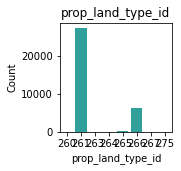

     prop_land_type_id  Count              Percent
261                261  27114              80.3400
266                266   6386              18.9200
265                265    203               0.6000
275                275     22               0.0700
267                263     12               0.0400
263                267      8               0.0200
264                260      2               0.0100
260                264      2               0.0100
_________________________________________________________________


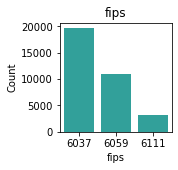

      fips  Count              Percent
6037  6037  19656              58.2400
6059  6059  10886              32.2600
6111  6111   3207               9.5000
_________________________________________________________________


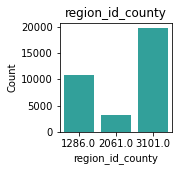

               region_id_county  Count              Percent
3,101.0000           3,101.0000  19656              58.2400
1,286.0000           1,286.0000  10886              32.2600
2,061.0000           2,061.0000   3207               9.5000
_________________________________________________________________


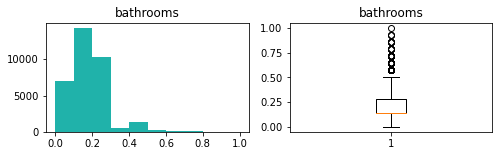

count            33,749.0000
mean                  0.1702
std                   0.1194
min                   0.0000
25%                   0.1429
50%                   0.1429
75%                   0.2857
max                   1.0000
Name: bathrooms, dtype: float64


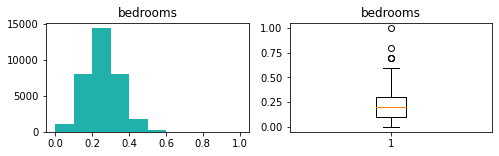

count            33,749.0000
mean                  0.2064
std                   0.0947
min                   0.0000
25%                   0.1000
50%                   0.2000
75%                   0.3000
max                   1.0000
Name: bedrooms, dtype: float64


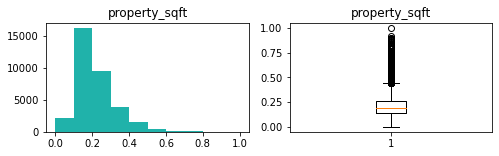

count            33,749.0000
mean                  0.2157
std                   0.1034
min                   0.0000
25%                   0.1440
50%                   0.1909
75%                   0.2625
max                   1.0000
Name: property_sqft, dtype: float64


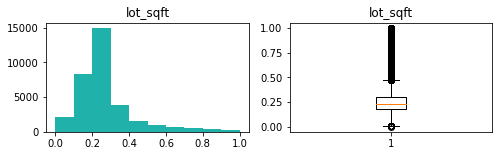

count            33,749.0000
mean                  0.2717
std                   0.1588
min                   0.0000
25%                   0.1850
50%                   0.2352
75%                   0.2996
max                   1.0000
Name: lot_sqft, dtype: float64


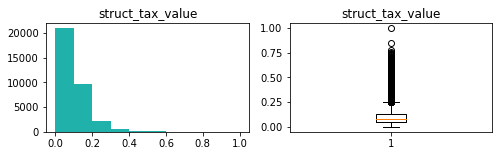

count            33,749.0000
mean                  0.1011
std                   0.0783
min                   0.0000
25%                   0.0492
50%                   0.0809
75%                   0.1288
max                   1.0000
Name: struct_tax_value, dtype: float64


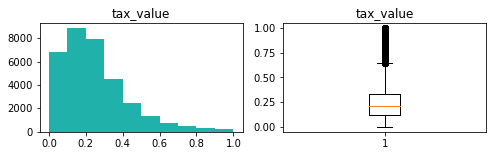

count            33,749.0000
mean                  0.2506
std                   0.1811
min                   0.0000
25%                   0.1201
50%                   0.2135
75%                   0.3311
max                   1.0000
Name: tax_value, dtype: float64


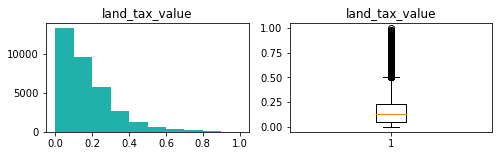

count            33,749.0000
mean                  0.1663
std                   0.1444
min                   0.0000
25%                   0.0541
50%                   0.1344
75%                   0.2348
max                   1.0000
Name: land_tax_value, dtype: float64


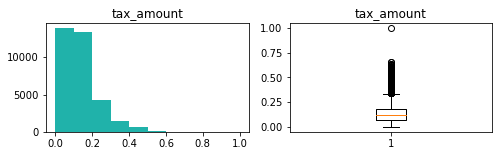

count            33,749.0000
mean                  0.1368
std                   0.0941
min                   0.0000
25%                   0.0704
50%                   0.1169
75%                   0.1773
max                   1.0000
Name: tax_amount, dtype: float64


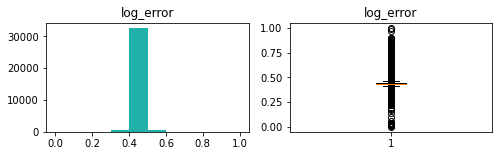

count            33,749.0000
mean                  0.4401
std                   0.0288
min                   0.0000
25%                   0.4327
50%                   0.4381
75%                   0.4438
max                   1.0000
Name: log_error, dtype: float64


In [20]:
ex.explore_univariate(train, categorical_vars, quant_vars)

- Features with a lot of outliers:
    - bathrooms, property_sqft, lot_sqft, struct_tax_value, tax_value, land_tax_value, tax_amount, and log_error
- Bedrooms appear to be normally distributed
- Lat and long are good indicators of population density by location, also I shouldn't of Scaled lat and long.
- 


In [9]:
pd.crosstab(train[binary_vars].mean(), train[categorical_target].mean(), margins=True)

KeyError: "None of [Index(['orange_cnty', 'ventura_cnty'], dtype='object')] are in the [columns]"

In [ ]:
# ex.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

In [ ]:
# for var in binary_vars:
#     ex.explore_multivariate(train, categorical_target, var, quant_vars)